# Second half of 2019 US Flight Data Exploration and Visualization

##  Junly 2019 - December 2019) 

## by Qian Li

## Investigation Overview

> In this investigation,I wanted to look at the following questions:
- How does the flight vary weekdays during month for delayed and cancelled?
- How does each carriers' flight status in each month? 

The main focus was on the five features of US flights: Month, DayOfWeek, ArrDelay, Cancelled, unique carrier code. 

## Dataset Overview

> The dataset reports 3787699 United States domestic flights from the US Department of Transportation including carriers, arrival and departure delays, and reasons for delays ect., from 1987 to 2020. In this report, I will gather & analyze flights of 2019 from July to December. 5196 rows with no tail number have been removed and nine data columns were removed from the analysis due to inconsistencies or missing information. There are 3782503 flights' informations with 21 columns in the dataset will be used. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
result = pd.read_csv('result.csv')
result_clean = result.copy()

In [3]:
# Divided AIR TIME into six parts  
[result_clean['AIR_TIME'].min(),result_clean['AIR_TIME'].max()]

[6.0, 696.0]

In [4]:

result_clean['AIRTIME'] = result_clean['AIR_TIME'].apply(lambda x: 'Within 2 hours' if x <= 120
                                                   else '2 - 4 hours' if 120 < x <= 240 
                                                   else '4 - 6 hours' if 240 < x <= 360
                                                   else '6 - 8 hours' if 360 < x <= 480
                                                   else '8 - 10 hours' if 480 < x <= 600
                                                   else '10 - 12 hours' if 600 < x <= 720
                                                   else x)

In [5]:
# Define a function to check whether the flight has been cancelled. 
def is_cancelled(x):
    return x > 0
result_clean['IS_CANCELLED'] = result_clean['CANCELLED'].apply(is_cancelled)

In [6]:
result_clean['IS_CANCELLED'] = result_clean['CANCELLED'].apply(lambda x: x > 0)

In [7]:
# Define a function to check whether the flight has been delayed. 
def is_delayed(x):
    return x > 0
result_clean['IS_DELAY'] = result_clean['ARR_DELAY'].apply(is_delayed)

In [8]:
result_clean['DELAYED'] = result_clean['ARR_DELAY'].apply(lambda x: x > 0)

In [9]:
# Creating flight status into dataframe
def flight_status(x):
    if x > 0:
        return 'Delayed'
    else:
        return 'Normal'

result_clean['Delayed'] = result_clean.DELAYED.apply(flight_status)  

In [10]:
def flight_status(x):
    if x > 0:
        return 'Cancelled'

result_clean['Cancelled'] = result_clean.IS_CANCELLED.apply(flight_status) 

In [11]:
conditions = [
    (result_clean['Delayed'] == "Delayed"),
    (result_clean['Cancelled'] == "Cancelled"),
    ]
choices = ['Delayed', 'Cancelled']
result_clean['flight_status'] = np.select(conditions, choices, default="Normal")

In [12]:
Total_number_cause_of_delay = result_clean['CARRIER_DELAY'].value_counts()[1] + result_clean['WEATHER_DELAY'].value_counts()[1] + result_clean['NAS_DELAY'].value_counts()[1]
+ result_clean['LATE_AIRCRAFT_DELAY'].value_counts()[1] + result_clean['SECURITY_DELAY'].value_counts()[1]
CARRIER_DELAY = result_clean['CARRIER_DELAY'].value_counts()[1]/Total_number_cause_of_delay
WEATHER_DELAY = result_clean['WEATHER_DELAY'].value_counts()[1]/Total_number_cause_of_delay
NAS_DELAY = result_clean['NAS_DELAY'].value_counts()[1]/Total_number_cause_of_delay
LATE_AIRCRAFT_DELAY = result_clean['LATE_AIRCRAFT_DELAY'].value_counts()[1]/Total_number_cause_of_delay
SECURITY_DELAY = result_clean['SECURITY_DELAY'].value_counts()[1]/Total_number_cause_of_delay
print(Total_number_cause_of_delay)
Delay_reson = [CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY]
Delay_reson


28399


[0.43829008063664215,
 0.03137434416704814,
 0.5303355751963097,
 0.17486531215887882,
 0.0023240254938554175]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### Pencetage of Delay Reason

From the output, we could see that there are 324914 (45.37%) flights delayed due to carrier, there are 35987 (5.03%) flights delayed due to weather, 355183 (49.6%) flights delayed due to nas, 344653 (48.13%) flights delayed due to late aircraft, and 2184 (0.305%) flights due to security.

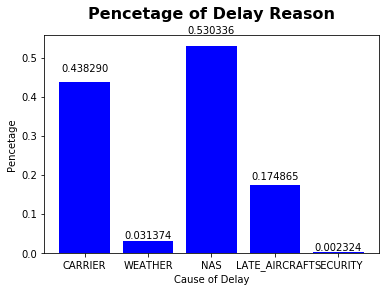

In [13]:
Delay_reson = [CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY]
cause_of_delay = ['CARRIER','WEATHER','NAS','LATE_AIRCRAFT','SECURITY']

Delay_reson_pos = [i for i, _ in enumerate(cause_of_delay)]

fig, ax = plt.subplots()
re = ax.bar(Delay_reson_pos, Delay_reson, color='b')

plt.xlabel("Cause of Delay")
plt.ylabel("Pencetage")
plt.title("Pencetage of Delay Reason", y = 1.05, fontsize = 16, fontweight = 'bold')
plt.xticks(Delay_reson_pos, cause_of_delay)

def autolabel(rects):

    for rect in re:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(re)
plt.show();

## The percentage of flights status - cancelled, delayed and normal

There are 2512863 (66.4%) flights can depart on time, 1225183 (32.4%) flights are delayed, 44457 (1.2%) flights are cancelled.

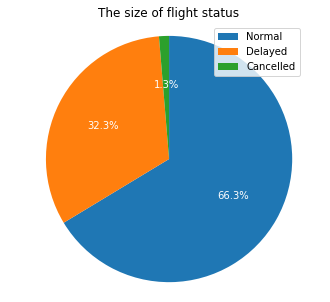

In [14]:
flight_status = result_clean['flight_status'].value_counts()
plt.figure(figsize = [12,5]);
plt.pie(flight_status, labels = flight_status.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.axis('square');
plt.legend()
plt.title('The size of flight status');

### What's flight status for each Company? 

The flights departed from WN have most number of flights are normal, Delayed and cancelled, next is DL,AA,OO and UA. That may because these company carried the most airplanes.

In [15]:
default_color = sb.color_palette()[0]

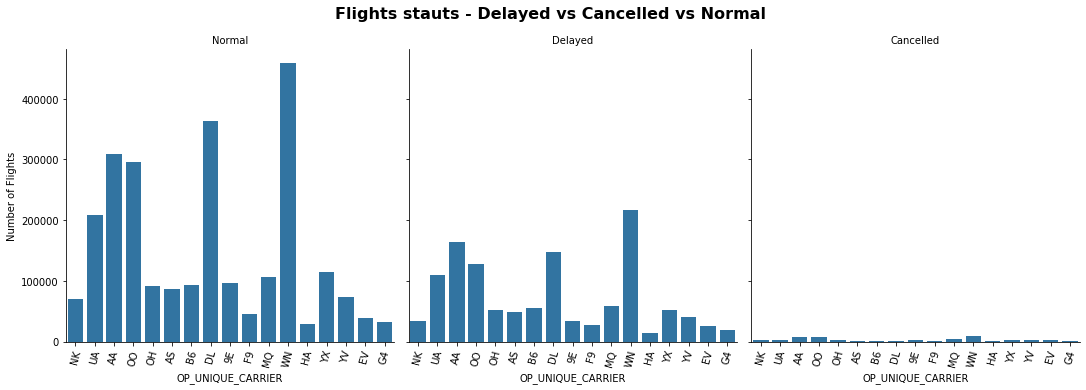

In [16]:
# Flights stauts for each carrier
graph = sb.catplot(data=result_clean, x='OP_UNIQUE_CARRIER', col="flight_status", kind='count', sharey = True, color = default_color);

graph.set_axis_labels("OP_UNIQUE_CARRIER", "Number of Flights");
graph.set_titles("{col_name}");

graph.fig.suptitle('Flights stauts - Delayed vs Cancelled vs Normal', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);


### What's the relationship between month and flight status?
There is no big difference of flight depart on time between months.From last section, we know that July and August have most flights, and September has lowest flights, which is same as here in Delayed satus, September has lowerest delayed flights and highest on time flights. Due to the weather situation, the flights in December have similar delayed flights as July and August.However, the highest rate of flights cancelled in July and August, after is September,December and October. The least cancelled rate is in November.

<Figure size 576x360 with 0 Axes>

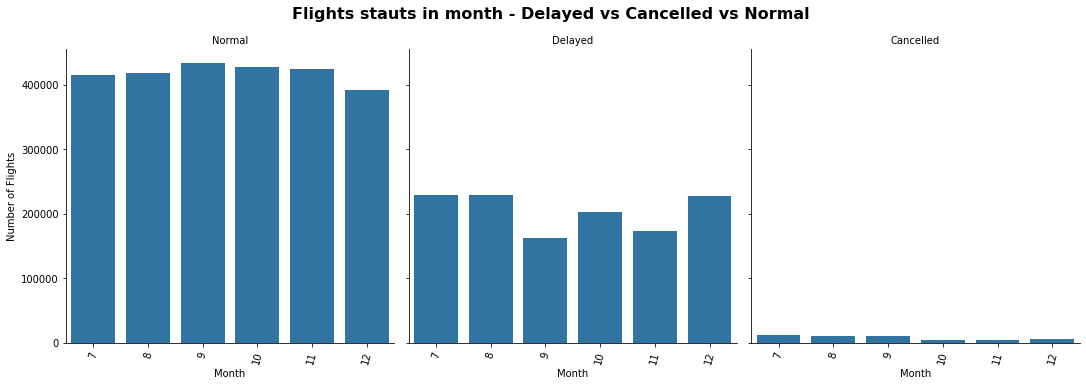

In [17]:
# Flights stauts in month - Delayed vs Cancelled vs Normal
plt.figure(figsize = [8, 5]);
graph = sb.catplot(data = result_clean, x = 'MONTH', col = "flight_status", kind = 'count', sharey = True, color = default_color);

graph.set_axis_labels("Month", "Number of Flights");
graph.set_titles("{col_name}");

graph.fig.suptitle('Flights stauts in month - Delayed vs Cancelled vs Normal', y = 1.05, fontsize=16, fontweight = 'bold');
graph.set_xticklabels(rotation = 75);

### What's the relationship between weekday and flight status?
There is no big difference of flight depart on time between weekdays.From last section, we know that There are most Flights on Monday and least flights on Saturday, which is same as here in Delayed satus. However, the highest cancelled rate of flights is on Thursday, and least is on Sunday.

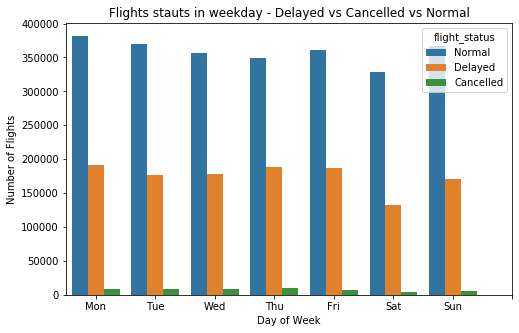

In [18]:
# Flights stauts in weekday - Delayed vs Cancelled vs Normal
plt.figure(figsize = [8, 5])
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sb.countplot(data = result_clean, x='DAY_OF_WEEK', hue='flight_status');
plt.xticks(np.arange(0,7+1,1),weekday)
plt.title('Flights stauts in weekday - Delayed vs Cancelled vs Normal')
plt.xlabel('Day of Week');
plt.ylabel('Number of Flights');

## What's the relationship between month and OP UNIQUE CARRIER?

From the output, company WN have most flights in July, and least in September. Company DL have most flight in June and least in November. Company AA have most flights in June and least in September. Most company carry lowest flights in September.

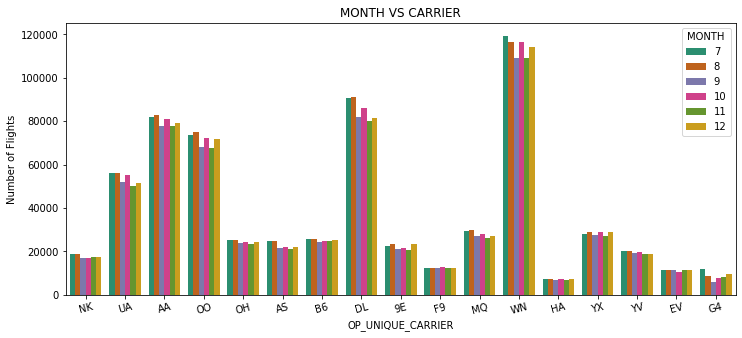

In [19]:
plt.figure(figsize = [12,5])
sb.countplot(data = result_clean,x = 'OP_UNIQUE_CARRIER',  hue = 'MONTH', color = default_color, palette="Dark2")
plt.xticks(rotation = 15)
plt.title('MONTH VS CARRIER')
plt.xlabel('OP_UNIQUE_CARRIER');
plt.ylabel('Number of Flights');

### What's the relationship between flight status and airtime?
The flights have flight time within 2 hours are more easier to be delayed. There are almost no flights will be delayed when the flight time over 6 hours.

<Figure size 576x360 with 0 Axes>

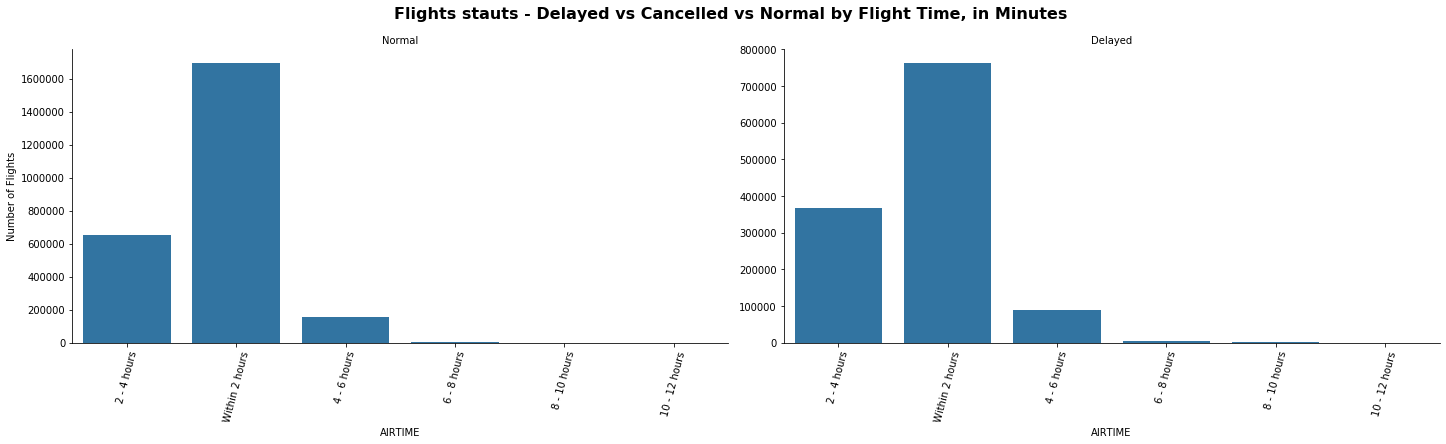

In [20]:
# Flights stauts - Delayed vs Normal by Flight Time, in Minutes 
plt.figure(figsize = [8, 5])
graph = sb.catplot(data = result_clean, x = 'AIRTIME', col='Delayed', kind = 'count', sharey = False, color = default_color, height = 5, aspect = 2);

graph.set_axis_labels('AIRTIME', 'Number of Flights');
graph.set_titles('{col_name}');

graph.fig.suptitle('Flights stauts - Delayed vs Cancelled vs Normal by Flight Time, in Minutes',y = 1.05, fontsize=16, fontweight = 'bold')
graph.set_xticklabels(rotation = 75);

### How does the flight vary weekdays during month for delayed and cancelled?
The heatmaps shows clearly the different flights situation between the two type of flight status. Dealyed flights happened heavily in Monday of December and Thursday of June. The flight on Saturday of September have lowest number of delayed flights. Cancelled flights happened heavily on Thursday of July, and least flights cancelled on Thursday and Sunday of Noverber. There are more flights delayed in the June and July, which is same for cancelled flights.


<Figure size 432x288 with 0 Axes>

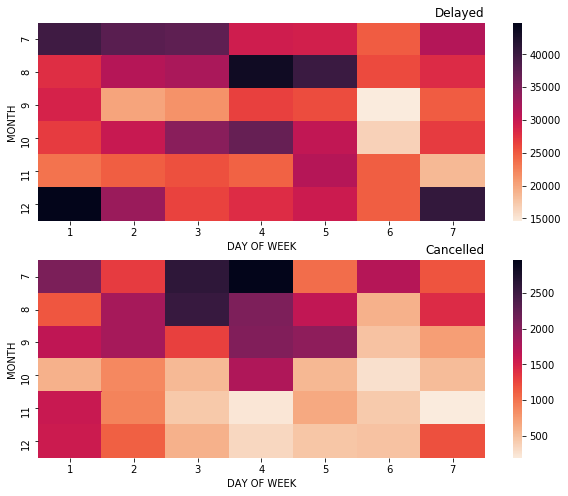

In [21]:
plt.suptitle('weekdays during month for Delayed and Cancelled')
plt.figure(figsize = [10, 8]);
plt.subplot(2, 1, 1)
Delayed = result_clean.query('flight_status == "Delayed"')
de = Delayed.groupby(['MONTH', 'DAY_OF_WEEK']).size()
de = de.reset_index(name='count')
de = de.pivot(index='MONTH', columns='DAY_OF_WEEK', values='count')
sb.heatmap(de, cmap='rocket_r');
plt.title('Delayed', loc='right');
plt.xlabel('DAY OF WEEK');
plt.ylabel('MONTH');

plt.subplot(2, 1, 2)
Cancelled = result_clean.query('flight_status == "Cancelled"')
ca = Cancelled.groupby(['MONTH', 'DAY_OF_WEEK']).size()
ca = ca.reset_index(name='count')
ca = ca.pivot(index='MONTH', columns='DAY_OF_WEEK', values='count')
sb.heatmap(ca, cmap='rocket_r');
plt.title('Cancelled', loc='right');
plt.xlabel('DAY OF WEEK');
plt.ylabel('MONTH');

### How does each carriers' flight status in each month?
Delayed flights happened heavily in WN (Southwest Airlines Co) in December and least number of delayed flights in September. Cancelled flights happened heavily in WN(Southwest Airlines Co) in June and least number of cancelled in November. Delayed flights happened heavily in AA(American Airlines Inc.) in June and least number of delayed flights in September. Cancelled flights happened heavily in AA(American Airlines Inc.) in June and least number of cancelled in December. HA runs the fewest airlines and it has the least number of delayed flights and does not have cancelled flight. If people want to buy flight tickets from Southwest Airlines Co, try to avoid buying June and December tickets. For American Airlines Inc, avoid buying the tickets for June, it has large probability that the flights would be cancelled.

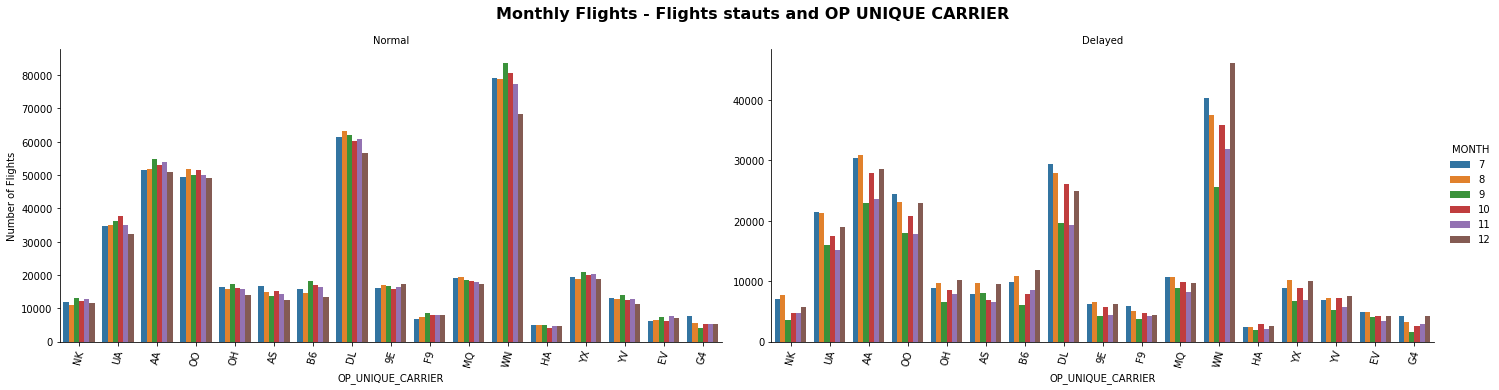

In [22]:
# Monthly Flights - Flights stauts and OP UNIQUE CARRIER

graph = sb.catplot(data = result_clean, x = 'OP_UNIQUE_CARRIER', col = 'Delayed', hue = "MONTH", kind = 'count', sharey = False, height = 5, aspect = 2);

graph.set_axis_labels("OP_UNIQUE_CARRIER", "Number of Flights")
graph._legend.set_title('MONTH')
graph.set_titles("{col_name}")

graph.fig.suptitle('Monthly Flights - Flights stauts and OP UNIQUE CARRIER', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

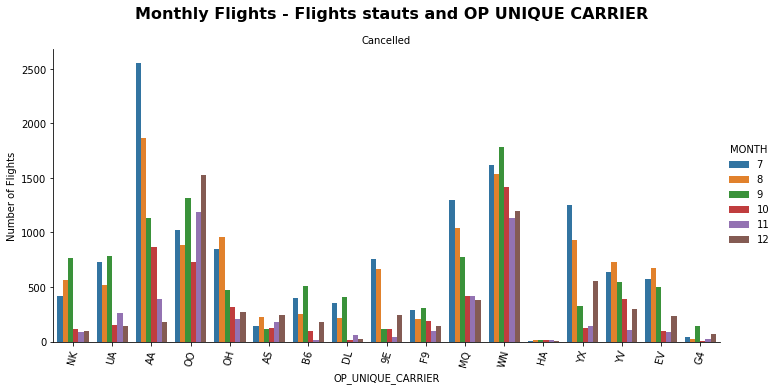

In [23]:
# Monthly Flights - Flights stauts and OP UNIQUE CARRIER

graph = sb.catplot(data = result_clean, x = 'OP_UNIQUE_CARRIER', col = 'Cancelled', hue = "MONTH", kind = 'count', sharey = False, height = 5, aspect = 2);

graph.set_axis_labels("OP_UNIQUE_CARRIER", "Number of Flights")
graph._legend.set_title('MONTH')
graph.set_titles("{col_name}")

graph.fig.suptitle('Monthly Flights - Flights stauts and OP UNIQUE CARRIER', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!